This will plot how the learning rate changes over time for triangular, triangular2, and exp_range modes.

In [18]:
import torch

import torch.optim as optim

import matplotlib.pyplot as plt

In [19]:
# Dummy model & optimizer

model = torch.nn.Linear(10,1)

optimizer = optim.SGD(model.parameters(),lr=0.1)

In [20]:
# Different scheduler modes to test

modes = ['triangular', 'triangular2', 'exp_range']

step_size_up = 10

max_lr = 0.1

base_lr = 0.001

epochs = 100

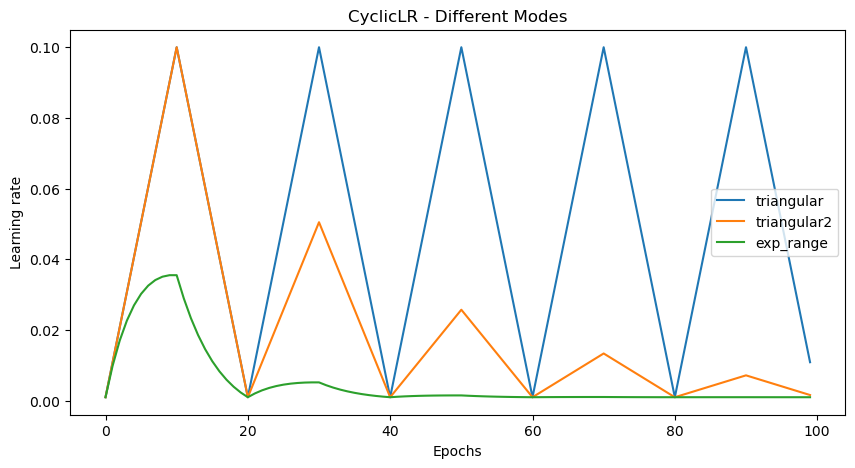

In [21]:
plt.figure(figsize=(10,5))

for mode in modes:

    optimizer.param_groups[0]['lr']= base_lr # Reset LR

    scheduler = optim.lr_scheduler.CyclicLR(optimizer,
                                            base_lr=base_lr,
                                            max_lr=max_lr,
                                            step_size_up=step_size_up,
                                            mode=mode,
                                            gamma=0.9)
    
    lrs =[]

    for epoch in range(epochs):

        optimizer.step()

        lrs.append(optimizer.param_groups[0]['lr'])

        scheduler.step()


    plt.plot(lrs, label= mode)

plt.xlabel('Epochs')

plt.ylabel('Learning rate')

plt.title("CyclicLR - Different Modes")

plt.legend()

plt.show()